# PCA 

### Author: [Marco Tavora](http://www.marcotavora.me/)

## Introduction

Principle Component Analysis or PCA is the best known dimensionality reduction algorithm. 


It combines existing features into fewer ones. Its goals are mainly:
- To transform original features "high-performance" ones
- To reduce the data dimensionality until you are left with the most relevant ones
- Remove multicollinearities

PCA is essentially a coordinate transformation where the original axes are features and the new axes (the new coordinate system for the data) are the *principal components*.

### Example

Let us consider the following example. Suppose my goal is to predict $y$ from the features $x_i$ with $i=1,2,3$. Since this is 3D data it is likely that multicollinearity is present. 

Applying PCA we will obtain "super-predictor variables" called *components*. These are linear combinations of predictors that generate new *principal components* and the latter explain the maximum possible amount of variance in the predictors:

$$PC_i = w_{1,i}x_1 + w_{2,i}x_2 + w_{3,i}x_3$$

where $i=1,2,3$. These principal components are uncorrelated. The new axes of principal components are the most concise descriptors of our data. More concretely, each consecutive direction aims at maximizing the remaining variance and each direction is orthogonal to the others

The total variance of your data gets redistributed among the principal components and most variance is captured in the first principal components and the noise is isolated to last principal compoments. Furthermore, there is no covariance between the principal components.

## Goal

I will apply PCA on a wine dataset.

### Loading packages and importing data

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

In [61]:
wine_original = pd.read_csv('wines.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Excluding the `red_wine` column

To separate the target from the features, we drop the `red_wine` column.

In [36]:
wine = wine_original.drop('red_wine', axis=1)

In [62]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Correlations

In [63]:
wc = wine.corr()
wc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Since the correlation matrix is symmetric, we can use `np.triu_indices_from` to obtain the indices for the upper-triangle of the matrix only:

In [64]:
upper_triangle = np.zeros_like(wc, dtype=np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True

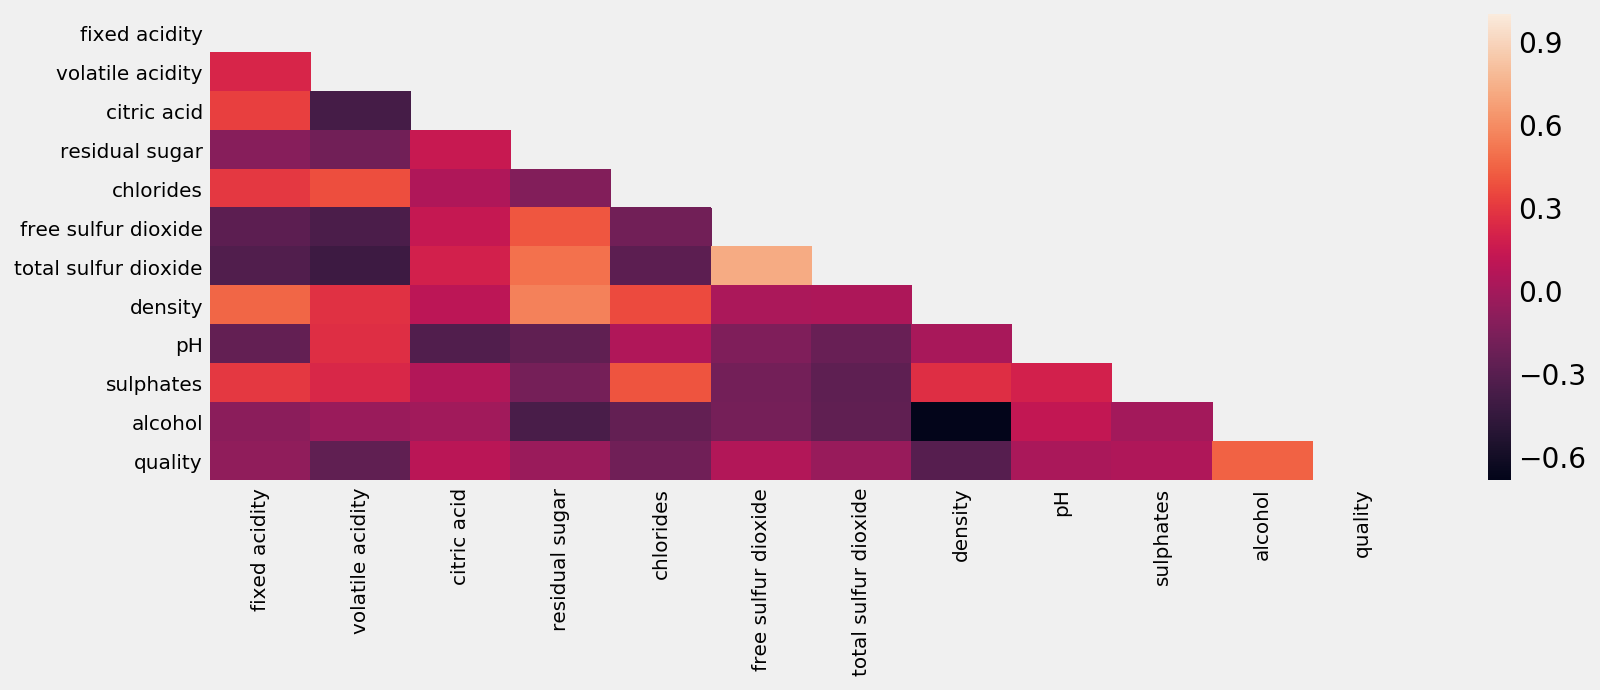

In [65]:
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.heatmap(wc, mask=upper_triangle)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

plt.show()

### Before applying PCA let us normalize the variables

To [optimize the performance](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) of the PCA algorithm, the data should be scaled. We will do that using `StandardScaler()` from `sklearn` which standardizes the features onto unit scale.

In [66]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wine_norm = ss.fit_transform(wine)
wine_norm

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [69]:
pd.DataFrame(wine_norm, columns=wine.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


### Fitting a PCA 

We build a `DataFrame` with the principal components, adding back the `red_wine` target column that was dropped.

In [70]:
from sklearn.decomposition import PCA

wpca = PCA().fit(wine_norm)
wpcs = wpca.transform(wine_norm)
wpcs = pd.DataFrame(wpcs, columns=['PC'+str(i) for i in range(1, wpcs.shape[1]+1)])

In [71]:
wpcs['red_wine'] = wine_original['red_wine']

In [72]:
wpcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,red_wine
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,1
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532,-0.114802,-0.449160,-0.258251,-0.014469,1
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350,-0.120635,-0.272888,-0.081613,0.053961,1
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690,-1.294900,0.212574,0.120527,-0.100574,1
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515,-0.646268,-0.069141,-0.104249,0.027643,1


### Plotting the variance explained ratio of the PC

The *explained variance* measures how much information (or variance) can be attributed to each PC. When we reduce the dimensionality, some information, or equivalently, some of the variance is lost. The attribute `explained_variance_ratio_` we find that the first principal component contains 25% of the variance.

Their are given by

$$ EV_i = \bigg(\frac{{\text{eigenvalue}}_i}{\sum_j^n{\text{eigenvalue}_j}}\bigg) * 100$$

In [86]:
print('Information contained in each PC:')
PCs = ['PC_{}'.format(i) for i in range(1,1+len(list(wpca.explained_variance_ratio_)))]
EV = [round(i,2) for i in list(wpca.explained_variance_ratio_)]
list(zip(PCs,EV))

Information contained in each PC:


[('PC_1', 0.25),
 ('PC_2', 0.22),
 ('PC_3', 0.14),
 ('PC_4', 0.09),
 ('PC_5', 0.07),
 ('PC_6', 0.06),
 ('PC_7', 0.05),
 ('PC_8', 0.04),
 ('PC_9', 0.04),
 ('PC_10', 0.02),
 ('PC_11', 0.02),
 ('PC_12', 0.0)]

Text(0.5,0,'PC')

Text(0,0.5,'Explained Variance')

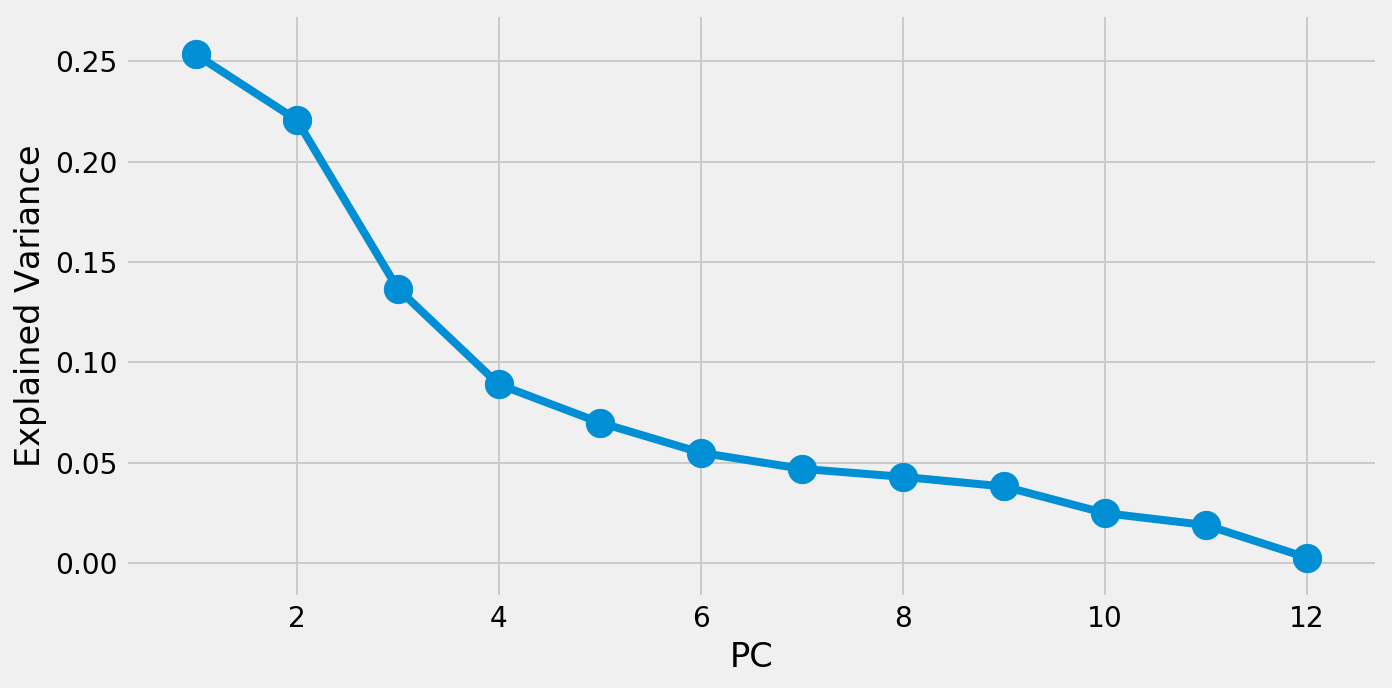

In [88]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(1, wc.shape[1]+1), wpca.explained_variance_ratio_)
ax.scatter(range(1, wine.shape[1]+1), wpca.explained_variance_ratio_, s=200)
ax.set_xlabel('PC')
ax.set_ylabel('Explained Variance')
plt.show()

### Component weights with corresponding variables for the PCs

We now print out the weights (eigenvectors) with their corresponding variables. For that we use `.components_`. 

> These are the principal axes in feature space, representing the directions of maximum variance in the data. 

For example:

In [107]:
wpca.components_[0:3]

array([[-0.25692873, -0.39493118,  0.14646061,  0.31890519, -0.31344994,
         0.42269137,  0.47441968, -0.09243753, -0.20806957, -0.29985192,
        -0.05892408,  0.08747571],
       [ 0.26184306,  0.10519825,  0.14409348,  0.34258497,  0.2697701 ,
         0.11117878,  0.14394753,  0.55492047, -0.15292185,  0.1196342 ,
        -0.49272747, -0.29660091],
       [ 0.46748619, -0.27968932,  0.58807557, -0.0755017 ,  0.04676921,
        -0.09899801, -0.10128143, -0.05156338, -0.40678741,  0.16869128,
         0.21293142,  0.29583773]])

In [108]:
print("First eigenvector:\n")
print([round(i,2) for i in wpca.components_[0].tolist()])
print('')
print("Second eigenvector:\n")
print([round(i,2) for i in wpca.components_[1].tolist()])

First eigenvector:

[-0.26, -0.39, 0.15, 0.32, -0.31, 0.42, 0.47, -0.09, -0.21, -0.3, -0.06, 0.09]

Second eigenvector:

[0.26, 0.11, 0.14, 0.34, 0.27, 0.11, 0.14, 0.55, -0.15, 0.12, -0.49, -0.3]


In [110]:
for i in range(0,3):
    for col, comp in zip(wc.columns, wpca.components_[i]):
        print(col,':',round(comp,2))
    print('')

fixed acidity : -0.26
volatile acidity : -0.39
citric acid : 0.15
residual sugar : 0.32
chlorides : -0.31
free sulfur dioxide : 0.42
total sulfur dioxide : 0.47
density : -0.09
pH : -0.21
sulphates : -0.3
alcohol : -0.06
quality : 0.09

fixed acidity : 0.26
volatile acidity : 0.11
citric acid : 0.14
residual sugar : 0.34
chlorides : 0.27
free sulfur dioxide : 0.11
total sulfur dioxide : 0.14
density : 0.55
pH : -0.15
sulphates : 0.12
alcohol : -0.49
quality : -0.3

fixed acidity : 0.47
volatile acidity : -0.28
citric acid : 0.59
residual sugar : -0.08
chlorides : 0.05
free sulfur dioxide : -0.1
total sulfur dioxide : -0.1
density : -0.05
pH : -0.41
sulphates : 0.17
alcohol : 0.21
quality : 0.3



### Red vs white wines

We can check if the first three components are able to differentiate red from white wines using pairplots: 

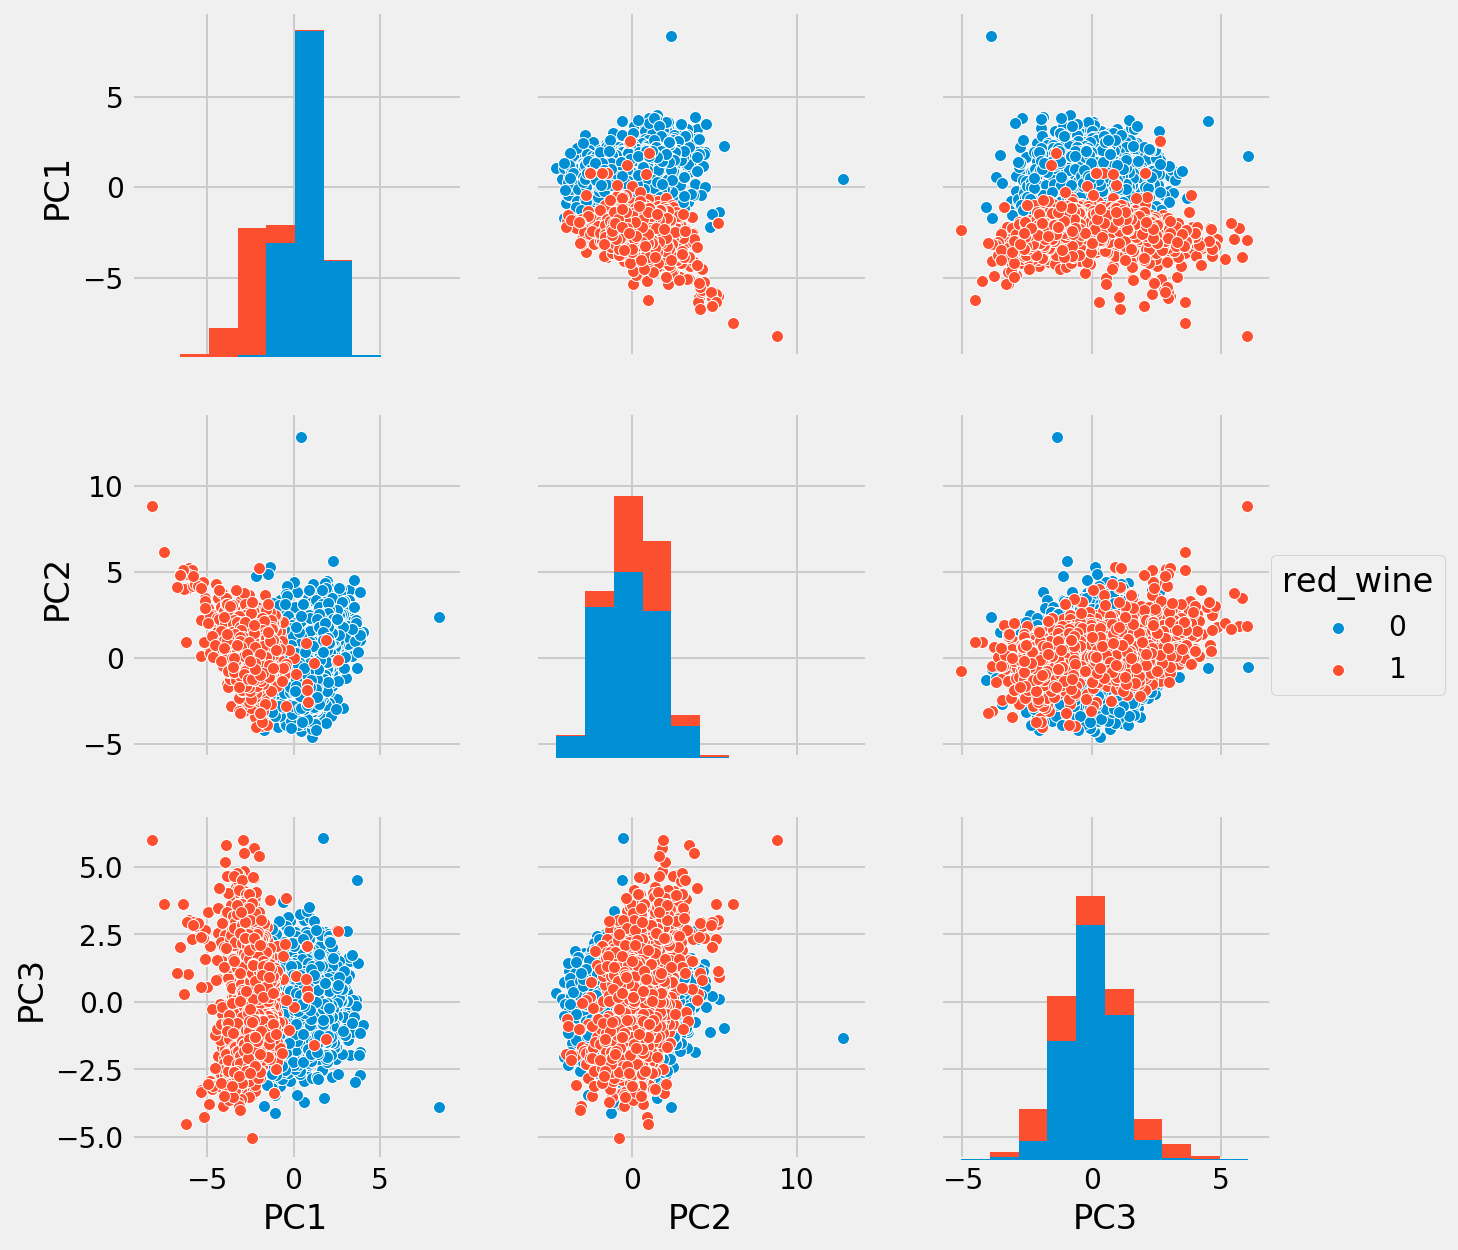

In [111]:
sns.pairplot(data=wpcs, vars=['PC1','PC2','PC3'], hue='red_wine', size=3)